# Decomposition: Trend & Seasonality
## Objective

Understand and isolate the structural components of a time series by decomposing it into:

- **Trend** – long-term direction

- **Seasonality** – repeating periodic patterns

- **Residuals (noise)** – unexplained variation

This notebook treats decomposition as signal extraction, not visualization only.

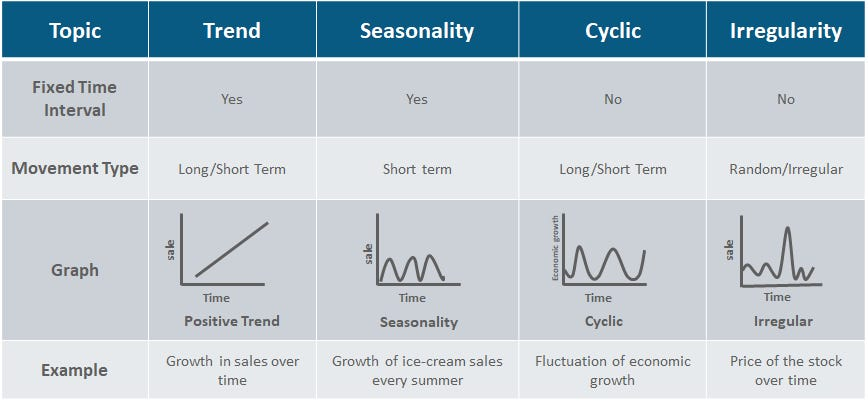

## Why Decomposition Matters

Before modeling or forecasting, it is critical to answer:

- Is the series trend-driven, seasonal, or both?

- Is seasonality additive or multiplicative?

- How stable are patterns over time?

- How much variance is noise vs signal?

Ignoring these questions leads to:

- Poor model selection

- Incorrect stationarity assumptions

- Unstable forecasts

## Imports and Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose, STL

# Dataset Assumptions

This notebook assumes:

- A univariate time series

- Proper datetime index

- Fixed frequency (daily, weekly, monthly, etc.)

Example structure:
>> date | value

In [10]:
DATA_PATH = "D:/GitHub/Data-Science-Techniques/datasets/Time-series/data.csv"

df = pd.read_csv(DATA_PATH, parse_dates=["date"], index_col="date")
df = df.asfreq("D")  # adjust frequency if needed

df

,value
date,
2022-01-01,6.290922
2022-01-02,6.213400
2022-01-03,11.921313
2022-01-04,17.807850
2022-01-05,15.485460
...,...
2023-12-27,53.599170
2023-12-28,51.525481
2023-12-29,48.071789


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2022-01-01 to 2023-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


# Visual Inspection
## Raw Time Series

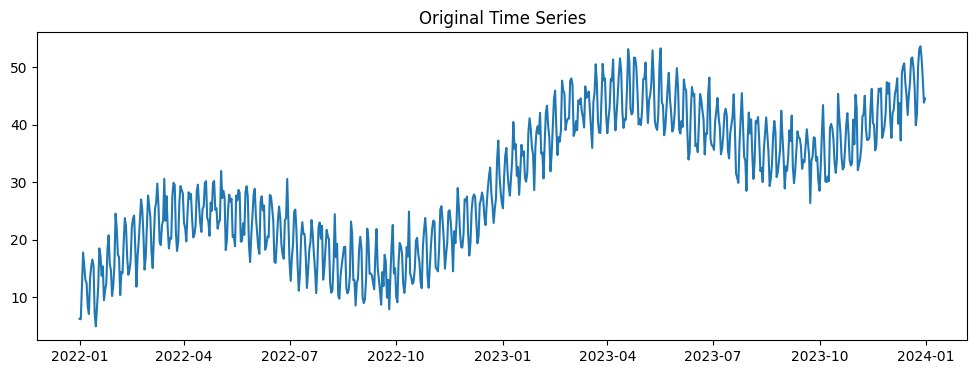

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["value"])
plt.title("Original Time Series")
plt.show()

**Questions to ask:**

- Is there an obvious trend?

- Is seasonality visually apparent?

- Are there regime changes or anomalies?

# Additive vs Multiplicative Decomposition
## Conceptual Difference

| Type           | Assumption                           |
| -------------- | ------------------------------------ |
| Additive       | Seasonal amplitude is constant       |
| Multiplicative | Seasonal amplitude scales with level |


## Additive Decomposition

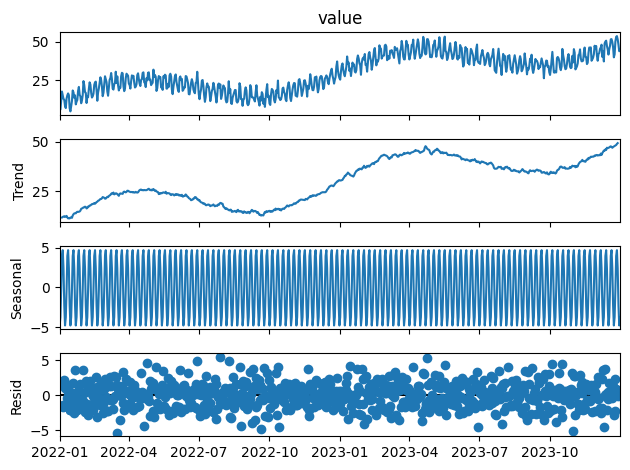

In [27]:
decomp_add = seasonal_decompose(
    df["value"],
    model="additive",
    period=7  # example: weekly seasonality
)

decomp_add.plot()
plt.show()


### Interpretation

- **Trend:** smooth long-term movement

- **Seasonal:** repeating pattern

- **Residual:** unexplained variation

## Multiplicative Decomposition

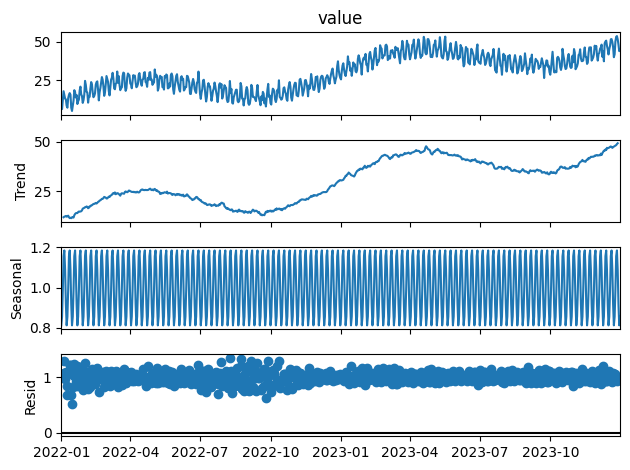

In [30]:
decomp_mul = seasonal_decompose(
    df["value"],
    model="multiplicative",
    period=7
)

decomp_mul.plot()
plt.show()


### When to Prefer Multiplicative

- Seasonal variance increases with series level

- Common in sales, demand, revenue data

# STL Decomposition (Recommended)
## Why STL?

- Robust to outliers

- Handles changing seasonality

- More flexible than classical decomposition

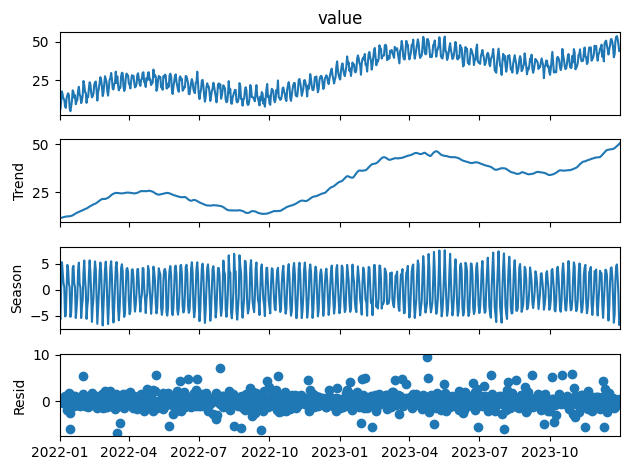

In [33]:
stl = STL(df["value"], period=7, robust=True)
stl_result = stl.fit()

stl_result.plot()
plt.show()

# Component Analysis
## Trend Component

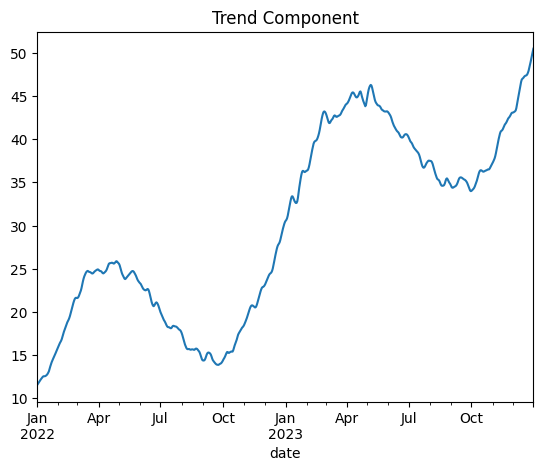

In [36]:
stl_result.trend.dropna().plot(title="Trend Component")
plt.show()


### Used for:

- Long-term forecasting
- Detrending
- Business direction analysis

## Seasonal Component

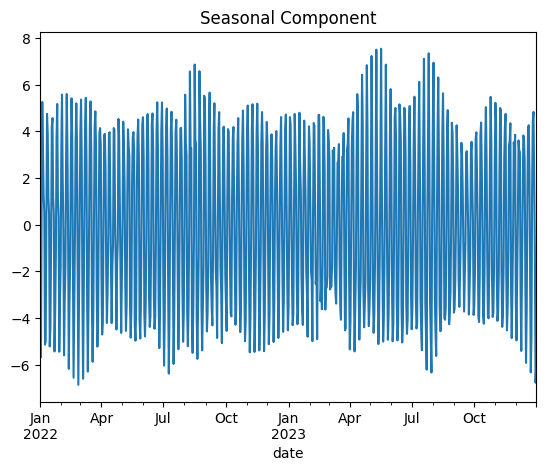

In [45]:
stl_result.seasonal.plot(title="Seasonal Component")
plt.show()

### Used for:

- Seasonal feature engineering
- Seasonal adjustment
- Calendar-driven effects
## Residual Component

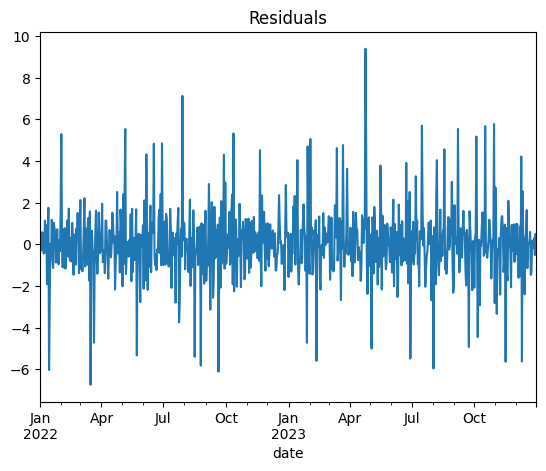

In [49]:
stl_result.resid.plot(title="Residuals")
plt.show()

### Key check:

- Should resemble white noise
- Strong structure → missing features or wrong period

# Seasonal Subseries Plot (Optional but Powerful)

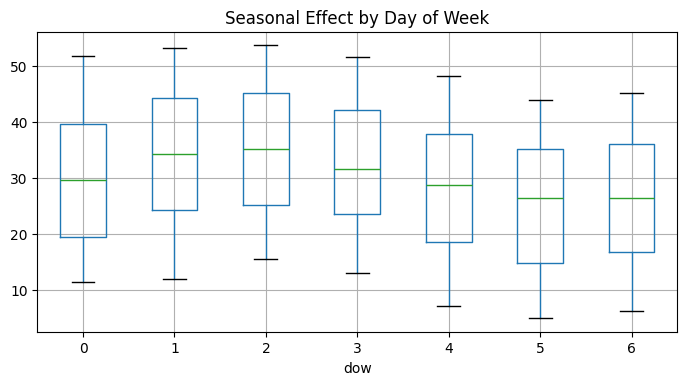

In [56]:
df["dow"] = df.index.dayofweek

df.boxplot(column="value", by="dow", figsize=(8, 4))
plt.title("Seasonal Effect by Day of Week")
plt.suptitle("")
plt.show()

# Practical Takeaways

- Decomposition is diagnostic, not decorative
- Trend and seasonality guide:
    - Model choice
    - Feature engineering
    - Validation strategy
- STL should be the default in most real-world cases

# Common Mistakes

- `[cons] -` Decomposing without fixing frequency
- `[cons] -` Guessing seasonality period
- `[cons] -` Using residuals without inspection
- `[cons] -` Treating decomposition as a one-time step

# How This Feeds the Pipeline

| Next Stage          | Usage                            |
| ------------------- | -------------------------------- |
| Feature Engineering | Seasonal & trend-based features  |
| Modeling            | ARIMA / SARIMA / ETS assumptions |
| Validation          | Horizon-aware evaluation         |
| Production          | Seasonal adjustment & monitoring |


# Key Rule

>> Never model a time series before understanding its trend and seasonality.